In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD

In [143]:
data = make_blobs(n_samples=1000, n_features=2, centers=2, random_state=101)

In [144]:
X, y = data

In [145]:
df = pd.DataFrame(X)

<IPython.core.display.Javascript object>


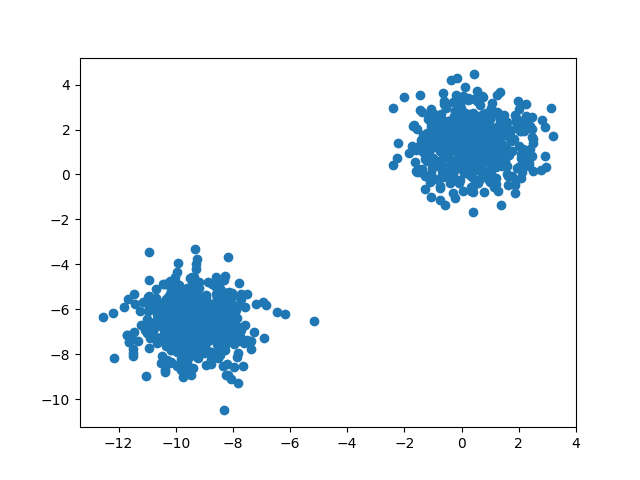

In [146]:
plt.figure()
plt.scatter(df[0], df[1])

In [148]:
df

,0,1
0,-0.234506,2.116887
1,-8.557753,-6.446805
2,0.973105,1.115715
3,-9.572593,-6.903419
4,-0.213872,-1.036922
...,...,...
995,-10.359938,-6.719522
996,-9.657499,-5.551157
997,1.099943,1.707568
998,1.580916,0.365004


In [149]:
np.random.seed(seed=101)
# z_noise = np.random.random(size=len(X))
# z_noise = pd.Series(z_noise)
z_noise = pd.Series(np.ones(len(X))*5)

In [150]:
df = pd.concat([df, z_noise], axis=1)
df

,0,1,0
0,-0.234506,2.116887,5.0
1,-8.557753,-6.446805,5.0
2,0.973105,1.115715,5.0
3,-9.572593,-6.903419,5.0
4,-0.213872,-1.036922,5.0
...,...,...,...
995,-10.359938,-6.719522,5.0
996,-9.657499,-5.551157,5.0
997,1.099943,1.707568,5.0
998,1.580916,0.365004,5.0


In [151]:
df.columns = ['X1', 'X2', 'X3']
df

,X1,X2,X3
0,-0.234506,2.116887,5.0
1,-8.557753,-6.446805,5.0
2,0.973105,1.115715,5.0
3,-9.572593,-6.903419,5.0
4,-0.213872,-1.036922,5.0
...,...,...,...
995,-10.359938,-6.719522,5.0
996,-9.657499,-5.551157,5.0
997,1.099943,1.707568,5.0
998,1.580916,0.365004,5.0


In [152]:
%matplotlib notebook

<IPython.core.display.Javascript object>


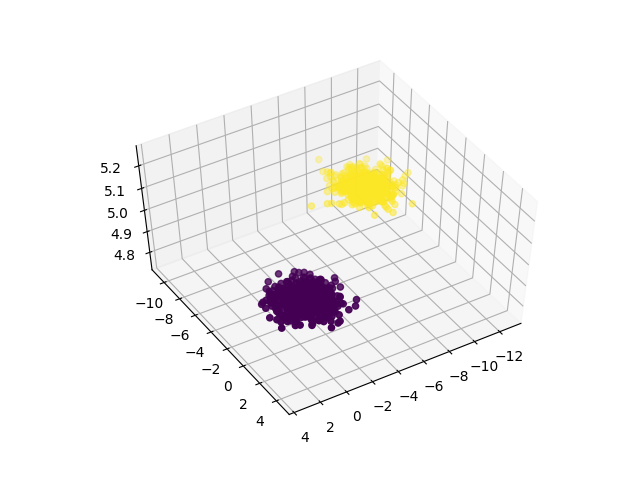

In [153]:
fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
axes.scatter(df['X1'], df['X2'], df['X3'], c=y)

In [206]:
encoder = Sequential()
encoder.add(Dense(units=30, activation='relu', input_shape=[3]))
encoder.add(Dense(units=20, activation='relu'))
encoder.add(Dense(units=2, activation='relu'))

In [207]:
decoder = Sequential()
decoder.add(Dense(units=10, activation='relu', input_shape=[2]))
decoder.add(Dense(units=3, activation='relu'))

In [208]:
auto_encoder = Sequential([encoder, decoder])
auto_encoder.compile(loss='mse', optimizer='adam')
auto_encoder.summary()

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_36 (Sequential)   (None, 2)                 782       
_________________________________________________________________
sequential_37 (Sequential)   (None, 3)                 63        
Total params: 845
Trainable params: 845
Non-trainable params: 0
_________________________________________________________________


In [209]:
from sklearn.preprocessing import MinMaxScaler

In [210]:
scaler = MinMaxScaler()
scaler_df = scaler.fit_transform(df)
scaler_df.shape

(1000, 3)

In [211]:
auto_encoder.fit(scaler_df, scaler_df, epochs=100, batch_size=1)

Epoch 1/100
1000/1000 [==============================] - 1s 682us/step - loss: 0.0084
Epoch 2/100
1000/1000 [==============================] - 1s 684us/step - loss: 2.3929e-04
Epoch 3/100
1000/1000 [==============================] - 1s 668us/step - loss: 3.9750e-05
Epoch 4/100
1000/1000 [==============================] - 1s 692us/step - loss: 2.8179e-05
Epoch 5/100
1000/1000 [==============================] - 1s 648us/step - loss: 1.6659e-05
Epoch 6/100
1000/1000 [==============================] - 1s 666us/step - loss: 2.3621e-05
Epoch 7/100
1000/1000 [==============================] - 1s 709us/step - loss: 1.4920e-05
Epoch 8/100
1000/1000 [==============================] - 1s 653us/step - loss: 3.8002e-05
Epoch 9/100
1000/1000 [==============================] - 1s 664us/step - loss: 2.1358e-05
Epoch 10/100
1000/1000 [==============================] - 1s 726us/step - loss: 4.7900e-05
Epoch 11/100
1000/1000 [==============================] - 1s 646us/step - loss: 1.1578e-05
Epoch 12/100

1000/1000 [==============================] - 1s 941us/step - loss: 1.3701e-05
Epoch 92/100
1000/1000 [==============================] - 1s 971us/step - loss: 1.0896e-05
Epoch 93/100
1000/1000 [==============================] - 1s 1ms/step - loss: 4.8801e-06
Epoch 94/100
1000/1000 [==============================] - 1s 919us/step - loss: 1.1786e-05
Epoch 95/100
1000/1000 [==============================] - 1s 879us/step - loss: 6.3542e-06
Epoch 96/100
1000/1000 [==============================] - 1s 848us/step - loss: 5.9907e-06
Epoch 97/100
1000/1000 [==============================] - 1s 735us/step - loss: 8.5150e-06
Epoch 98/100
1000/1000 [==============================] - 1s 687us/step - loss: 4.4168e-06
Epoch 99/100
1000/1000 [==============================] - 1s 824us/step - loss: 6.2746e-06
Epoch 100/100
1000/1000 [==============================] - 1s 697us/step - loss: 1.2314e-05


<IPython.core.display.Javascript object>


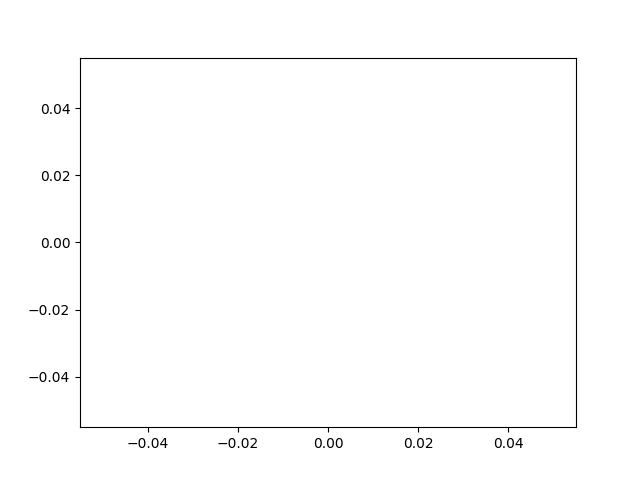

In [212]:
plt.figure()
history = auto_encoder.history.history
epoch = list(range(len(history['loss'])))
plt.plot(epoch[100:], history['loss'][100:])

In [213]:
encoded_2d = encoder.predict(scaler_df)

In [214]:
encoded_2d

array([[0.50574875, 1.5692317 ],
       [0.36006773, 0.50019205],
       [0.32845575, 1.5480428 ],
       ...,
       [0.3714777 , 1.6005843 ],
       [0.217394  , 1.5179853 ],
       [0.49580857, 0.6493223 ]], dtype=float32)

In [215]:
scaler_df.shape

(1000, 3)

<IPython.core.display.Javascript object>


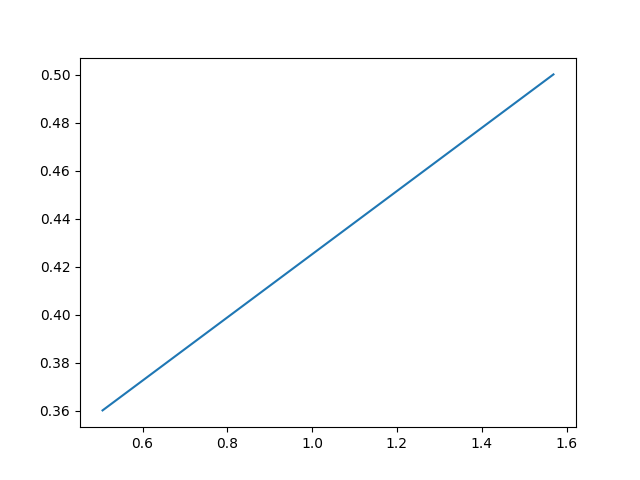

In [216]:
fig = plt.figure()
plt.plot(encoded_2d[0], encoded_2d[1])

In [217]:
decoded_3d = decoder.predict(encoded_2d)

<IPython.core.display.Javascript object>


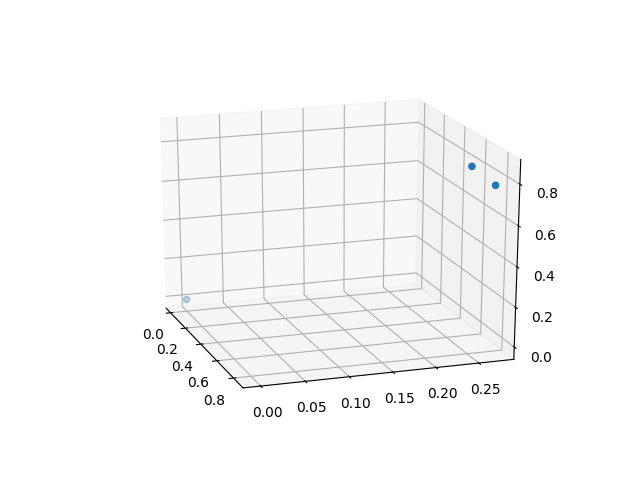

array([[0.77813864, 0.8485498 , 0.        ],
       [0.25291824, 0.27166647, 0.        ],
       [0.85508007, 0.7810274 , 0.        ],
       ...,
       [0.8629321 , 0.8209133 , 0.        ],
       [0.89388686, 0.7304077 , 0.        ],
       [0.26837838, 0.38925952, 0.        ]], dtype=float32)

In [218]:
fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
axes.scatter(decoded_3d[0], decoded_3d[1], decoded_3d[2])
decoded_3d